<a href="https://colab.research.google.com/github/marcosesoj/Analise-de-dados-e-predicao/blob/main/2_Projeto_Analise_de_Dados_e_Predicao_com_Python_e_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - Importação das bibliotecas necessárias para construção do projeto.**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **2 - Importando e lendo as 5 primeiras linhas do dataset disponibilizado na trilha.**

In [11]:
df = pd.read_csv("/content/drive/MyDrive/2_Projeto_Analise_Dados/base-alugueis-sp.csv", sep = ',')

In [12]:
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


# **3 - Consultando o tamanho do dataset**

In [13]:
df.shape

(11657, 8)

# **4 - Verificando a existência de dados duplicados no dataset**

In [14]:
df.duplicated().sum()

0

# **5 - Verificando a existência de dados nulos no dataset.**

In [15]:
df.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

# **6 - Identificando o tipo de dados de cada variável**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


# **7 - Descrição sobre o dataset**

In [17]:
df.describe().round(2)

,area,bedrooms,garage,rent,total
count,11657.00,11657.00,11657.00,11657.00,11657.00
mean,84.66,1.97,1.06,3250.81,4080.03
std,74.02,0.93,1.13,2650.71,3352.48
min,0.00,0.00,0.00,500.00,509.00
25%,40.00,1.00,0.00,1590.00,1996.00
50%,60.00,2.00,1.00,2415.00,3057.00
75%,96.00,3.00,2.00,3800.00,4774.00
max,580.00,6.00,6.00,25000.00,28700.00


# <font color='red' style='font-size: 20px;'>❗Considerando que a variável "area" é área m², não faz sentido imoveis com área no tamanho 0(m²). Com isso, consideraremos o dataset com area a partir de 40(m²).❗</font>
<hr style='border: 2px solid red;'>

In [18]:
dados = df[df['area'] >= 40]

# **8 - No dataset existe um campo com nome de "Total", mas não há um significado para essa coluna. Com isso, desconsideraremos do nosso modelo**

In [19]:
dados.drop(['total'], axis = 1, inplace=True)

# **9 - Analisando os dados categoricos do dataset (Tipo de imóveis)**

<Axes: title={'center': 'Contagem de imoveis por tipos'}, xlabel='Tipos de imóveis', ylabel='Quantidade'>

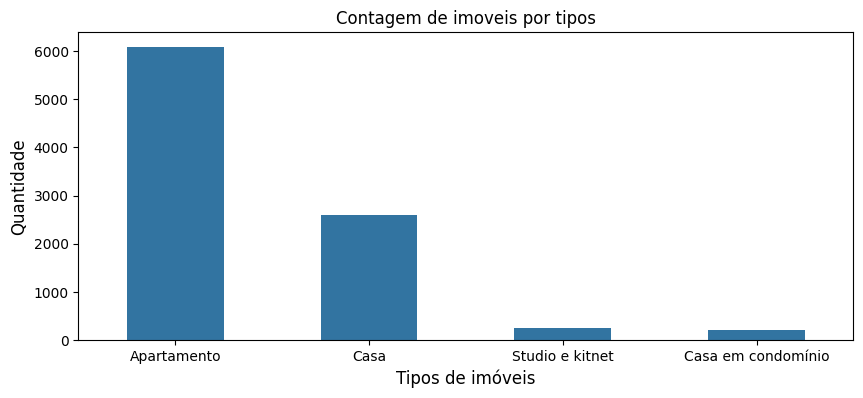

In [20]:
contagem_tipo = dados["type"].value_counts().sort_values(ascending=False).index
ax = sns.countplot(x=dados["type"], order=contagem_tipo, width = 0.5)
ax.figure.set_size_inches(10,4)
ax.set_title('Contagem de imoveis por tipos', fontsize = 12)
ax.set_xlabel('Tipos de imóveis', fontsize = 12)
ax.set_ylabel('Quantidade', fontsize = 12)
ax

In [21]:
tipo_imoveis = dados['type'].value_counts(normalize=True)
tipo_imoveis

type
Apartamento           0.665246
Casa                  0.284044
Studio e kitnet       0.028525
Casa em condomínio    0.022186
Name: proportion, dtype: float64

Percebe-se que 66% do nosso dataset é composto por imóveis do tipo Apartamento.

# **10 - Matriz de correlação entre as variáveis**

In [22]:
dados.corr(numeric_only=True)

,area,bedrooms,garage,rent
area,1.000000,0.680729,0.699057,0.650634
bedrooms,0.680729,1.000000,0.600887,0.498116
garage,0.699057,0.600887,1.000000,0.591061
rent,0.650634,0.498116,0.591061,1.000000


# **11 - Alterando as cores dos gráficos**

In [23]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

## **12 - Analisando o comportamento da variável dependente Y - Rent (Aluguel)**

Text(0.5, 0, 'Preço dos Imóveis (R$)')

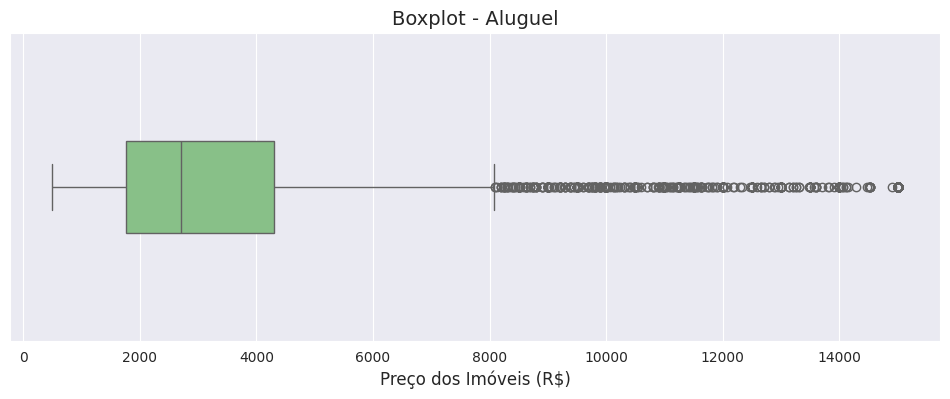

In [24]:
ax = sns.boxplot(dados['rent'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(12,4)
ax.set_title('Boxplot - Aluguel', fontsize = 14)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize = 12)

Analisar um conjunto de dados que relacionado a preços de imóveis é um pouco complexo, pois dentro do conjunto, encontraremos imóveis com preços baixos e preços elevados. No caso do boxplot acima, percebe-se "outlier" com valores superiores a R$ 8.000

# **12.1 - Estrutura boxplot**

In [25]:
Q1 = dados.rent.quantile(0.25)
Q3 = dados.rent.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

limite_inferior

-2025.0

# **13 - Distribuição de frequências**

<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Preço dos Imóveis (R$)', ylabel='Density'>

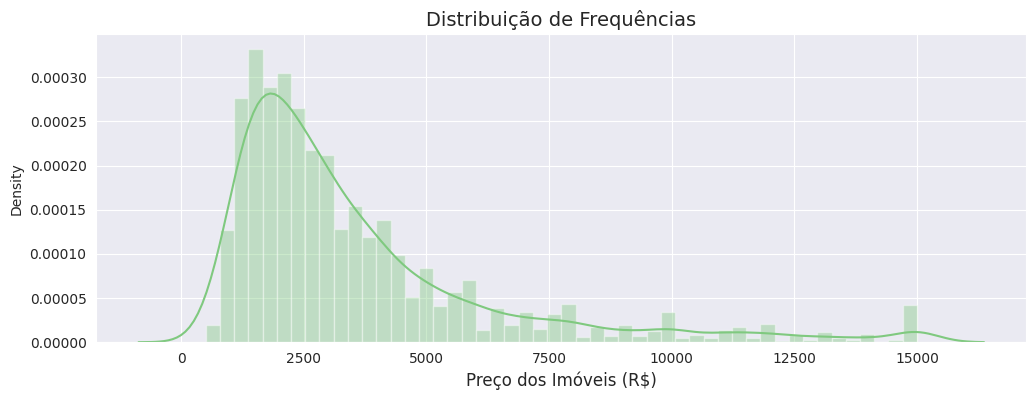

In [26]:
ax = sns.distplot(dados['rent'])
ax.figure.set_size_inches(12, 4)
ax.set_title('Distribuição de Frequências', fontsize=14)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=12)
ax

Analisando o gráfico acima, percebemos uma alta concentração de imoveis com valores mais baixos, mas ao olhar a extrema direita, percebemos um alto valor com poucos imoveis. O gráfico acima caracteriza uma assimetria à direita.

# **14 - Analisando dispersão entre as variáveis com pairplot**

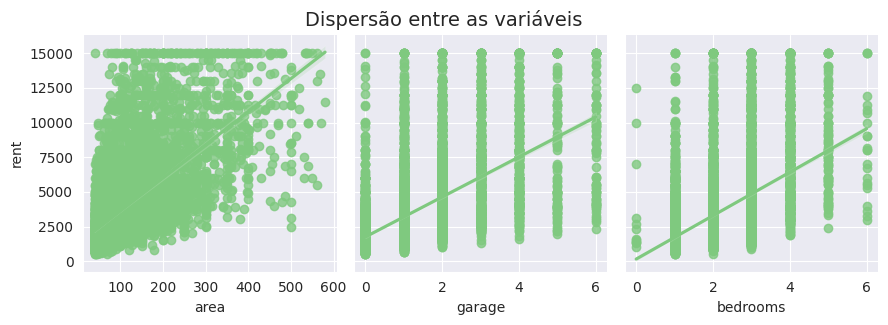

In [27]:
ax = sns.pairplot(dados, y_vars='rent', x_vars=['area', 'garage', 'bedrooms'], height=3, kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=14, y=1.05)
ax

# **15 - Transformando os dados. Aplicando transformação logarítmica**

*   Aproximação de uma distribuição Normal
*   Para as variáveis cujo o valor mínimo é 0, será somado + 1, pois o log(0) nos retornaria -inf, ao acrescentar + 1, o log(1) passa a ser 0.



In [28]:
dados['log_rent'] = np.log(dados['rent'])
dados['log_area'] = np.log(dados['area'])
dados['log_bedrooms'] = np.log(dados['bedrooms'] + 1)
dados['log_garage'] = np.log(dados['garage'] + 1)

In [29]:
dados.head()

,address,district,area,bedrooms,garage,type,rent,log_rent,log_area,log_bedrooms,log_garage
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,7.467371,4.025352,1.098612,1.098612
5,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,8.242756,3.912023,1.098612,0.693147
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento,3500,8.160518,4.276666,1.098612,0.693147
10,Rua dos Carmelitas,Sé,63,2,0,Apartamento,1500,7.313220,4.143135,1.098612,0.000000
13,Rua Herison,Lauzane Paulista,50,3,0,Casa em condomínio,1437,7.270313,3.912023,1.386294,0.000000


# **16 - Distribuição de frequência da variável dependente transformada (y)**

<Axes: title={'center': 'Distribuição de frequência variável dependente transformada (y)'}, xlabel='Log preço imóvel R$', ylabel='Density'>

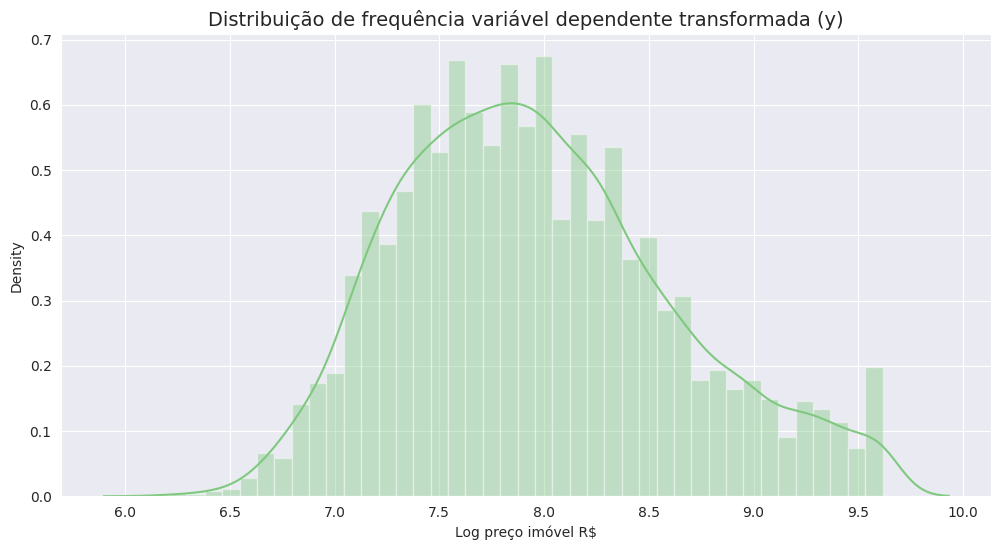

In [30]:
ax = sns.distplot(dados['log_rent'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência variável dependente transformada (y)', fontsize = 14)
ax.set_xlabel('Log preço imóvel R$')
ax

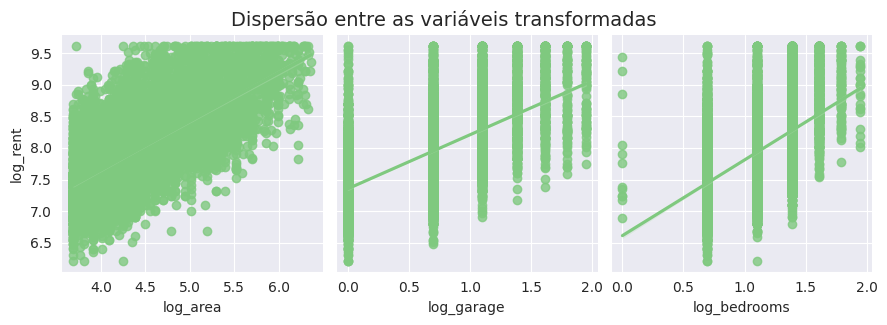

In [31]:
ax = sns.pairplot(dados, y_vars='log_rent', x_vars=['log_area', 'log_garage', 'log_bedrooms'], height=3, kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis transformadas', fontsize=14, y=1.05)
ax

# **17 - Criação dos datasets de Treino e Testes**


*   Nesta etapa, usaremos a biblioteca scikit-learn, precisamente, o módulo train_test_split
*   Será estabelecido um percentual de 30% da amostra para teste.


In [32]:
from sklearn.model_selection import train_test_split

# **18 - Criação de uma Séries em Pandas para variável dependente (y)**

In [33]:
y = dados['log_rent']
y

3        7.467371
5        8.242756
6        8.160518
10       7.313220
13       7.270313
           ...   
11652    8.318742
11653    9.328123
11654    8.411833
11655    9.104980
11656    8.101678
Name: log_rent, Length: 9150, dtype: float64

# **19 - Criação de um dataframe em pandas para as variáveis explicativas (X)**

In [34]:
X = dados[['log_area','log_bedrooms','log_garage']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2108)

# **20 - Estimando modelo com Statsmodels**

In [36]:
X_train_com_constante = sm.add_constant(X_train)
X_train_com_constante.head()

,const,log_area,log_bedrooms,log_garage
10980,1.0,5.703782,1.386294,1.609438
6808,1.0,3.988984,1.098612,0.693147
355,1.0,4.248495,1.098612,0.693147
951,1.0,4.094345,1.098612,1.098612
8374,1.0,3.912023,0.693147,0.000000


In [37]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

# **21 - Avaliando o sumário das estastística**


*   Analisando os valores da tabela abaixo, temos um R² baixo, representando 0.530 e um Prob (F-statistic) 0.00.
*   Os P> |t| evidência que log_bedrooms não passou no teste <=0.05. Com isso, retiraremos essa variável log do nosso modelo.



In [38]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     2404.
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        10:19:56   Log-Likelihood:                -4007.2
No. Observations:                6405   AIC:                             8022.
Df Residuals:                    6401   BIC:                             8049.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.3350      0.051    105.066   

# **22 - Modificação e análise do novo modelo**

In [39]:
X = dados[['log_area', 'log_garage']]

# **22.1 - Criação o dataset de treino e teste**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2108)

# **22.2 - Estimando modelo**

In [41]:
X_train_com_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

# **22.3 - Imprimindo o sumário do novo modelo**

In [42]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:               log_rent   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     3606.
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        10:19:56   Log-Likelihood:                -4007.3
No. Observations:                6405   AIC:                             8021.
Df Residuals:                    6402   BIC:                             8041.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3324      0.050    105.743      0.0

# **23 - Estimando o modelo com os dados de treino**


*   Nesta etapa, utilizaremos o módulo LinearRegression, disponível na biblioteca scikit-learn.


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [44]:
modelo = LinearRegression()

In [45]:
modelo.fit(X_train, y_train)

LinearRegression()

# **24 - Obtendo o R² do modelo de treino**

In [46]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.53


# **25 - Gerando previsões para os dados de Teste (X_test) utilizando predict() do modelo.**

In [47]:
y_previsto = modelo.predict(X_test)

# **26 - Obtendo o R² do modelo de teste**

In [48]:
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

R² = 0.52


# **27 - Obtendo previsões**

# **27.1 - Entrada**

In [49]:
entrada = X_test[0:1]
entrada

,log_area,log_garage
11364,4.553877,1.098612


# **28 - Gerando previsão pontual**

*  Nota-se que o valor previsto é bastante inferior ao que estamos ciente. Isso acontece porquê o modelo está trabalhando sobre as variáveis em log.

In [50]:
modelo.predict(entrada)[0]

8.22183449937869

# **29 - Invertendo a transformação para obter a estimativa em R$**

In [51]:
np.exp(modelo.predict(entrada)[0])

3721.3228890188298

# <font color='green' style='font-size: 20px;'>❗Simulador de preços.❗</font>
<hr style='border: 2px solid red;'>

In [52]:
area = 450
garage = 3
entrada = [[np.log(area), np.log(garage) + 1]]

print('R$ {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$ 13383.82


#**30 - Gerando previsões do modelo para dados de treino**

In [53]:
y_previsto_train = modelo.predict(X_train)

# **31 - Previsão vs Real**

*   Percebe-se ainda uma dispersão mesmo ajustando os dados, mas de uma forma mais estrutura que a base anterior.

<Axes: title={'center': 'Previsao X Real'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

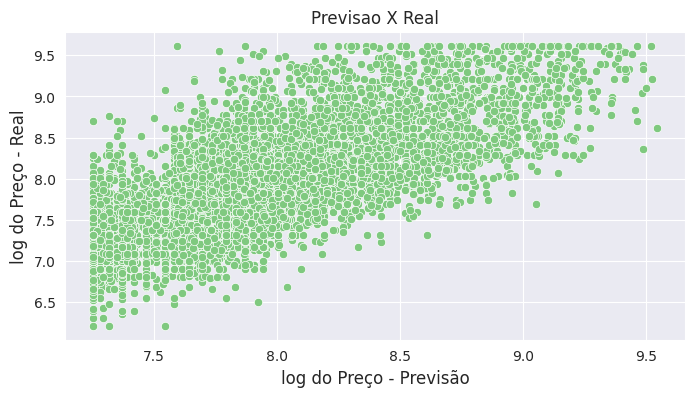

In [54]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(8, 4)
ax.set_title('Previsao X Real', fontsize=12)
ax.set_xlabel('log do Preço - Previsão', fontsize=12)
ax.set_ylabel('log do Preço - Real', fontsize=12)
ax

# **32 - Residuos**

In [55]:
residuo = y_train - y_previsto_train

<Axes: title={'center': 'Distribuição de Frequências dos resíduos'}, xlabel='log do preço', ylabel='Density'>

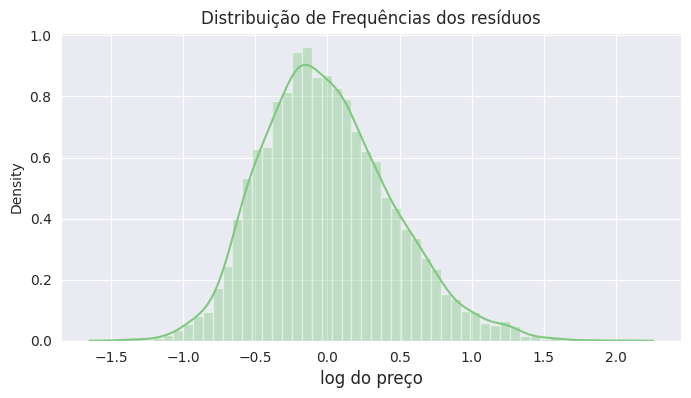

In [56]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(8, 4)
ax.set_title('Distribuição de Frequências dos resíduos', fontsize=12)
ax.set_xlabel('log do preço', fontsize=12)
ax

# **33 - Interpretação dos coeficientes**

In [57]:
modelo.intercept_

5.332399274064347

In [58]:
modelo.coef_

array([0.52132905, 0.46910719])

In [59]:
X.columns

Index(['log_area', 'log_garage'], dtype='object')

In [60]:
index = ['Intercepto', 'log área (m²)', 'log garagem']

In [61]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5.332399
log área (m²),0.521329
log garagem,0.469107


In [62]:
print('R$ {}'.format(np.exp(modelo.intercept_).round(2)))

R$ 206.93


## **Interpretação dos coeficientes**


1.   **Intercepto** = Excluindo as variaveis explicativas, o efeito médio dos imóveis será de **5.332399274064347** (intercept), seria em torno de R$ **206,93**.
2.   **Área (m²)** = Mantendo o valor da variável explicativa **Garagem** constante, um acréscimo de 1% na **Área (m2)** do imóvel gera, em média, **0,52%** de acréscimo no valor do imóvel.
3.    **Garagem** = Mantendo o valor da variável explicativa **Área (m²)** constante, um acréscimo de 1% na **Garagem** gerar, em média, **0.47%** de acréscimo no valor do imóvel.



